# Lab 1 Solution

1D example

This illustrates the generation of points of computations in the variable x and furthermore the computations of the probability density function values in the vector p

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pdffuns import *

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last" # all | last | last_expr | none 

In [4]:
x=np.arange(-10,10.5,0.5).reshape(-1,1)
my=1
Sgm=2
p=norm1D(my,Sgm,x)

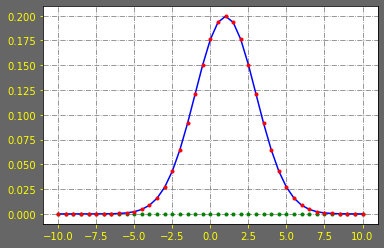

In [5]:
fc=np.array([1,1,1])*0.4
fig, ax=plt.subplots(1,1)
fig.set_facecolor(fc)
ax.plot(x,x*0,'g.')
ax.plot(x,p,'b')
ax.plot(x,p,'r.')
ax.grid(color='gray',linestyle='-.')
ax.tick_params(colors='yellow')
plt.show()

# Lab 1

by: Bjørn Christian Weinbach

## Declare variables

* Meshgrid
* mean vector
* Covariance-matrix

In [6]:
x1 = np.arange(-10,10.5,0.5).reshape(-1,1)
x2 = np.arange(-9,10.5,0.5).reshape(-1,1)
X, Y = np.meshgrid(x1, x2)
mu = np.array([1, 1])
sigma = np.array([[5, 3],[3, 5]])

## Calculate Z values

In [19]:
compo, Z = norm2D(mu, sigma, X, Y)

Text(0.5, 0.92, 'Bivariate Gaussian')

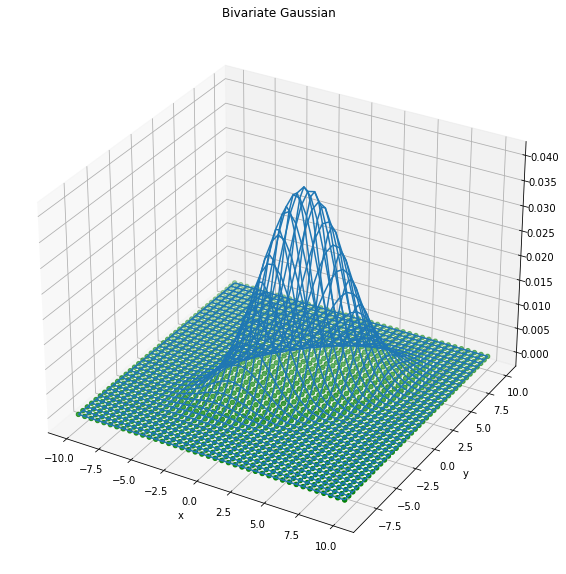

In [20]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X, Y, compo*0.00, color="green")
ax.plot_wireframe(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian")

## Code of pdffuns.py

In [ ]:
def norm2D(my, Sgm, X, Y):
    """
    Calculate bivariate normal distribution pdf values for a grid.

    Based on answer by https://stackoverflow.com/users/692734/user692734 on
    question: https://stackoverflow.com/questions/11615664

    PDF is based on the non-degenerate case in:
    https://en.wikipedia.org/wiki/Multivariate_normal_distribution

    Args:
        my (Numpy array):   Mean vector
        Sgm (Numpy array):  Covariance matrix
        X (Numpy array):    X coordinate
        Y (Numpy array):    Y xoordinate

    Returns:
        p (Numpy array):    2D pdf values across grid.
        comp (Numpy array): Points of computation.
    """
    [i, d] = np.shape(X)
    p = np.zeros(np.shape(X))
    comp = np.ones(np.shape(X))*0
    det = np.linalg.det(Sgm)

    for i in np.arange(0, i):
        for j in np.arange(0, d):
            p[i, j] = 1 / (np.sqrt((np.pi*2)**2 * det)) * \
                np.exp(-0.5 * np.matmul(
                    ([X[i, j], Y[i, j]] - my).T,
                    np.matmul(
                        np.linalg.inv(Sgm),
                        ([X[i, j], Y[i, j]] - my)
                    )
                )
            )

    return comp, p
